# Прогнозы и предсказания



## Описание проекта

### Задача

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    1) выделить целевые группы клиентов;

    2) предложить меры по снижению оттока;

    3) определить другие особенности взаимодействия с клиентами.

### Описание данных


«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

* 'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:

Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

* 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.


## Загрузка данных и обработка данных

In [1]:
# загружаю необходимые библиотеки
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
pd.set_option('display.float_format', '{:.3f}'.format) 

In [4]:
pd.set_option('display.max_colwidth', -1)

In [5]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227,5.000,3,0.020,0.000,0
1,0,1,0,0,1,12,1,31,113.203,12.000,7,1.923,1.910,0
2,0,1,1,0,1,1,0,28,129.448,1.000,2,1.859,1.737,0
3,0,1,1,1,1,12,1,33,62.670,12.000,2,3.206,3.357,0
4,1,1,1,1,1,1,0,26,198.362,1.000,3,1.114,1.120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406,12.000,8,2.284,2.349,0
3996,0,1,0,0,1,1,1,29,68.884,1.000,1,1.277,0.293,1
3997,1,1,1,1,1,12,0,28,78.251,11.000,2,2.786,2.831,0
3998,0,1,1,1,1,6,0,32,61.913,5.000,3,1.630,1.596,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000
mean,0.510,0.845,0.487,0.308,0.903,4.681,0.412,29.184,146.944,4.323,3.725,1.879,1.767,0.265
std,0.500,0.362,0.500,0.462,0.295,4.550,0.492,3.258,96.356,4.191,3.749,0.972,1.053,0.442
min,0.000,0.000,0.000,0.000,0.000,1.000,0.000,18.000,0.148,1.000,0.000,0.000,0.000,0.000
25%,0.000,1.000,0.000,0.000,1.000,1.000,0.000,27.000,68.869,1.000,1.000,1.181,0.963,0.000
50%,1.000,1.000,0.000,0.000,1.000,1.000,0.000,29.000,136.220,1.000,3.000,1.833,1.720,0.000
75%,1.000,1.000,1.000,1.000,1.000,6.000,1.000,31.000,210.950,6.000,5.000,2.536,2.510,1.000
max,1.000,1.000,1.000,1.000,1.000,12.000,1.000,41.000,552.591,12.000,31.000,6.024,6.147,1.000


In [9]:
#привожу названия столбцов к нижнему регистру
df.columns.tolist()

['gender',
 'Near_Location',
 'Partner',
 'Promo_friends',
 'Phone',
 'Contract_period',
 'Group_visits',
 'Age',
 'Avg_additional_charges_total',
 'Month_to_end_contract',
 'Lifetime',
 'Avg_class_frequency_total',
 'Avg_class_frequency_current_month',
 'Churn']

In [10]:
df.columns = df.columns.str.lower()

In [11]:
df.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

Я загрузил данные, посмотрел инфо и дубликаты, исправил названия столбцов. Дубликатов не обнаружено и пропусков тоже.




## Исследовательский анализ данных

In [12]:
#создаю таблицу, где сгруппированы все признаки по оттоку или не оттоку
churn_groupby = df.groupby('churn').agg('mean')

In [13]:
churn_groupby.T.reset_index()

churn,index,0,1
0,gender,0.510,0.511
1,near_location,0.873,0.768
2,partner,0.534,0.355
3,promo_friends,0.354,0.184
4,phone,0.904,0.903
5,contract_period,5.747,1.729
6,group_visits,0.464,0.269
7,age,29.977,26.990
8,avg_additional_charges_total,158.446,115.083
9,month_to_end_contract,5.283,1.663


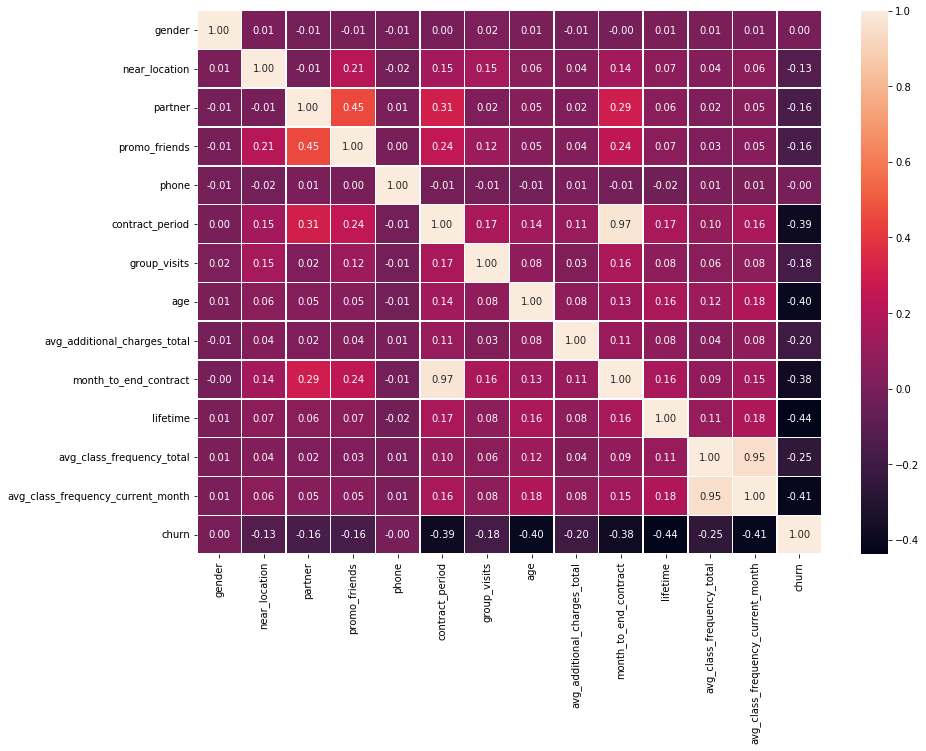

In [14]:
#строю матрицу корреляций
cm = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5)
plt.show()

Сразу бросается в глаза то, что есть корреляция между длительностью договора и количество оставшихся месяцев. А также использование промокода и клиент-сотрудник партнёра.

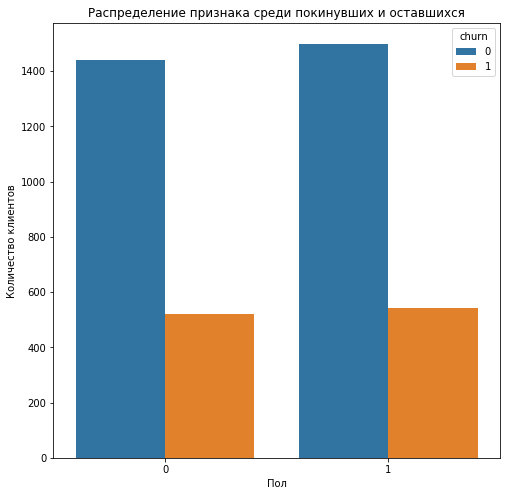

In [15]:
#график gender
plt.figure(figsize = (8,8))
sns.countplot(x=df['gender'], hue='churn',  data=df)
plt.title('Распределение признака среди покинувших и оставшихся')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.show()

На этом графике видно, что мужчин и женщин одинаковое количество

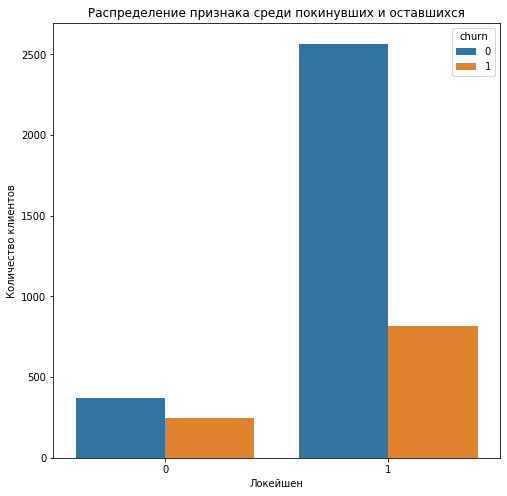

In [16]:
#график near location
plt.figure(figsize = (8,8))
sns.countplot(x=df['near_location'], hue='churn',  data=df)
plt.title('Распределение признака среди покинувших и оставшихся')
plt.xlabel('Локейшен')
plt.ylabel('Количество клиентов')
plt.show()

Здесь видно, что людей живущих рядом гораздо больше.

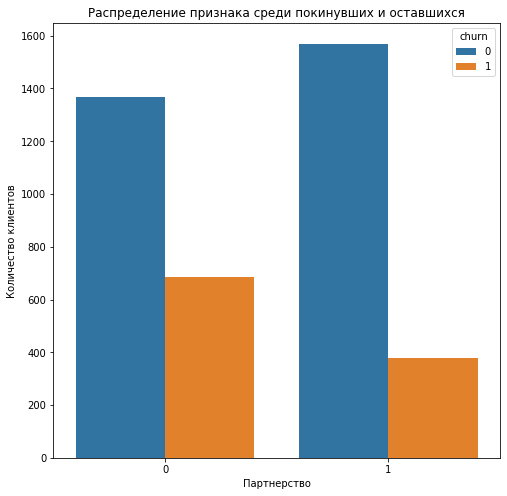

In [17]:
# график partner
plt.figure(figsize = (8,8))
sns.countplot(x=df['partner'], hue = 'churn',  data=df)
plt.title('Распределение признака среди покинувших и оставшихся')
plt.xlabel('Партнерство')
plt.ylabel('Количество клиентов')
plt.show()

Так же примерно поровну тех, кто является сотрудником компании-партёра

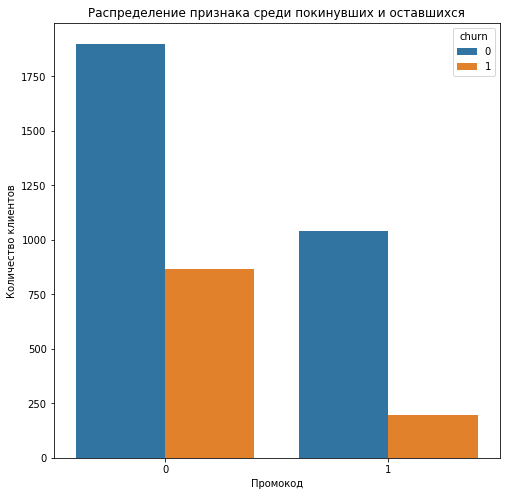

In [18]:
# график promo_friends
plt.figure(figsize = (8,8))
sns.countplot(x=df['promo_friends'], hue = 'churn',  data=df)
plt.title('Распределение признака среди покинувших и оставшихся')
plt.xlabel('Промокод')
plt.ylabel('Количество клиентов')
plt.show()

Количество людей пришедших по промокоду гораздо меньше.

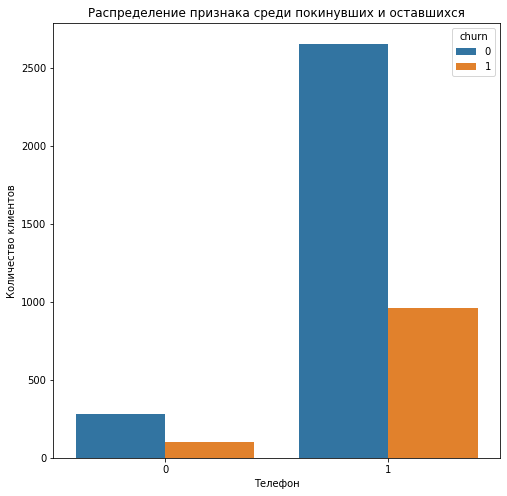

In [19]:
# график phone
plt.figure(figsize = (8,8))
sns.countplot(x=df['phone'], hue = 'churn',  data=df)
plt.title('Распределение признака среди покинувших и оставшихся')
plt.xlabel('Телефон')
plt.ylabel('Количество клиентов')
plt.show()

Клиентов оставивших номер телефона гораздо больше, чем без него.

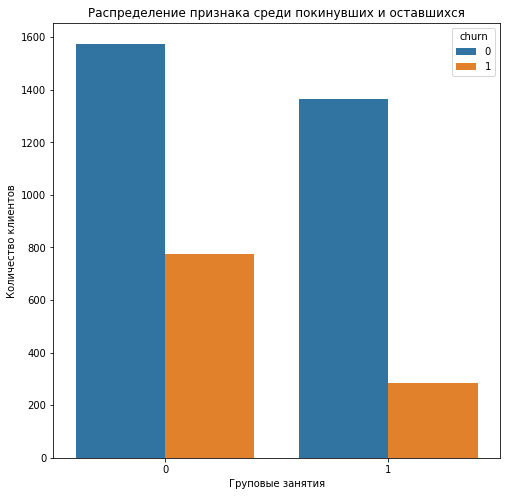

In [20]:
# график group_visits
plt.figure(figsize = (8,8))
sns.countplot(x=df['group_visits'], hue = 'churn',  data=df)
plt.title('Распределение признака среди покинувших и оставшихся')
plt.xlabel('Груповые занятия')
plt.ylabel('Количество клиентов')
plt.show()

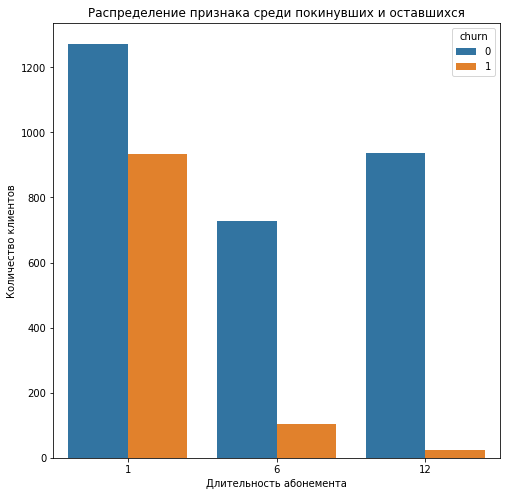

In [21]:
#график contract_period
plt.figure(figsize = (8,8))
sns.countplot(x=df['contract_period'], hue = 'churn',  data=df)
plt.title('Распределение признака среди покинувших и оставшихся')
plt.xlabel('Длительность абонемента')
plt.ylabel('Количество клиентов')
plt.show()

Наибольшее количество клиентов берут абонемент на один месяц, у них же и набольший отток.

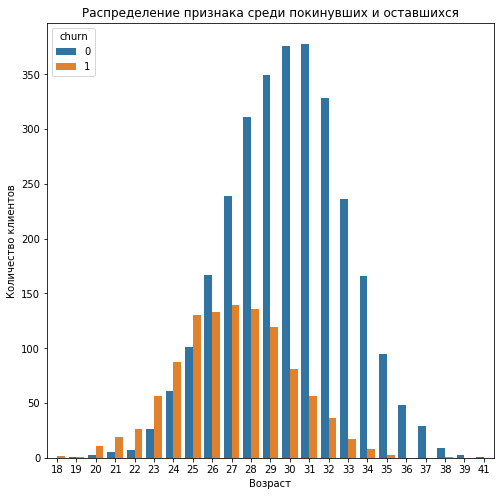

In [22]:
#график age

plt.figure(figsize = (8,8))
sns.countplot(x=df['age'], hue = 'churn',  data=df)
plt.title('Распределение признака среди покинувших и оставшихся')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

Здесь видно, что возраст оттекающиих клиентов меньше, чем у оставшихся

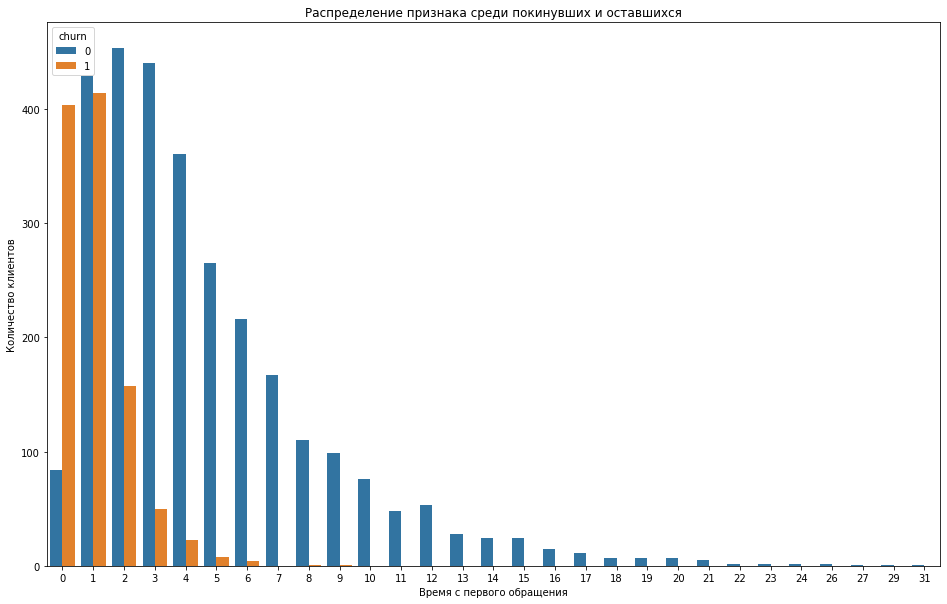

In [23]:
#график lifetime

plt.figure(figsize = (16,10))
sns.countplot(x=df['lifetime'], hue = 'churn',  data=df)
plt.title('Распределение признака среди покинувших и оставшихся')
plt.xlabel('Время с первого обращения')
plt.ylabel('Количество клиентов')
plt.show()

Чем больше времени проходит, тем меньше отток

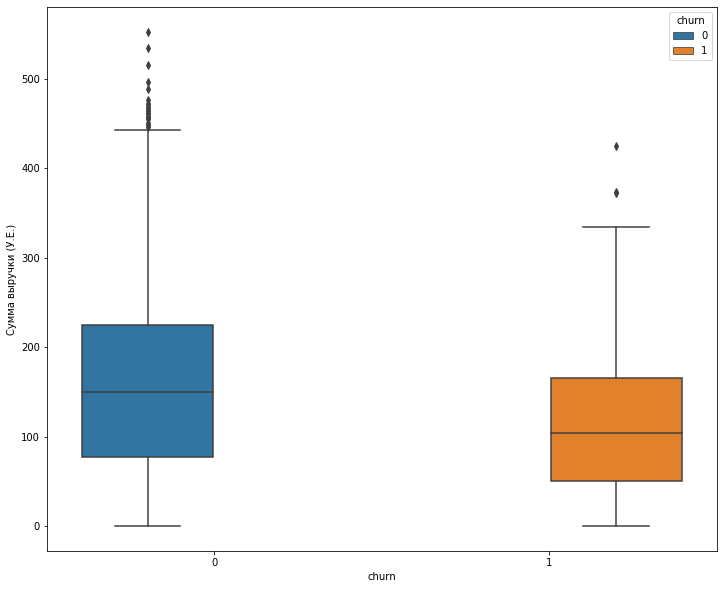

In [24]:
plt.figure(figsize = (12,10))
sns.boxplot(y='avg_additional_charges_total', x='churn', hue = 'churn',  data=df)
plt.ylabel('Сумма выручки (У.Е.)')
plt.show()

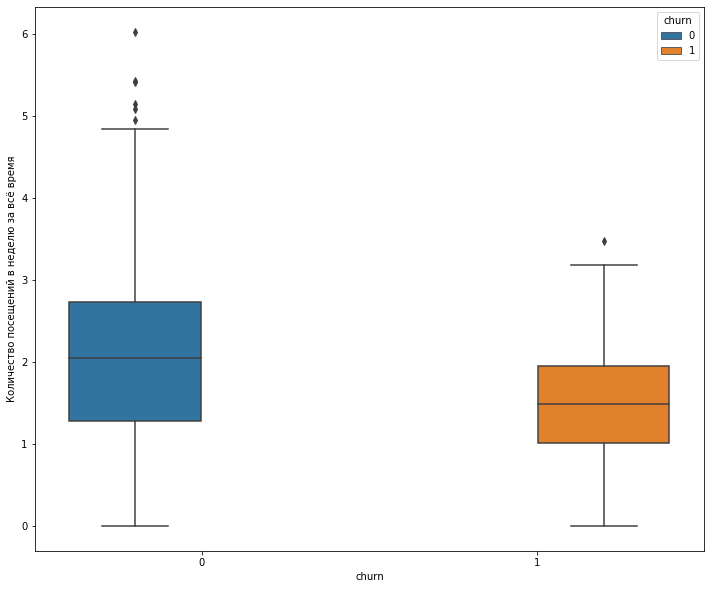

In [25]:
plt.figure(figsize = (12,10))
sns.boxplot(y='avg_class_frequency_total', x='churn', hue = 'churn',  data=df)
plt.ylabel('Количество посещений в неделю за всё время')
plt.show()

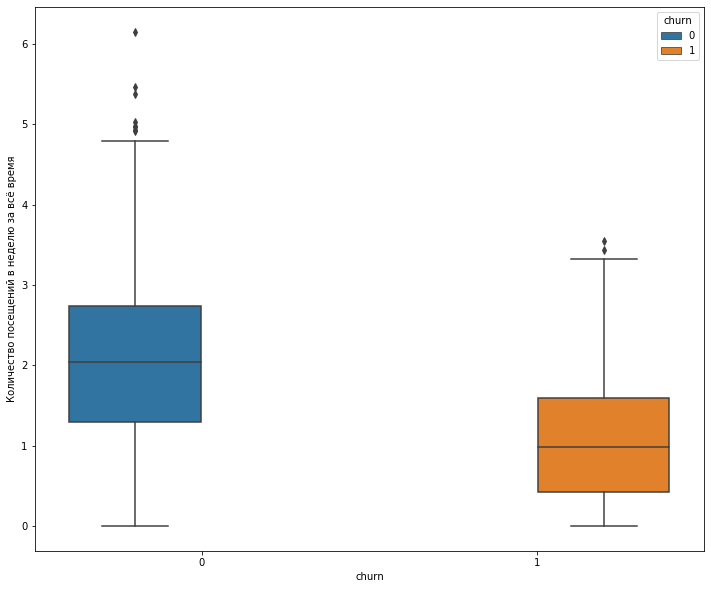

In [26]:
plt.figure(figsize = (12,10))
sns.boxplot(y='avg_class_frequency_current_month', x='churn', hue = 'churn',  data=df)
plt.ylabel('Количество посещений в неделю за всё время')
plt.show()

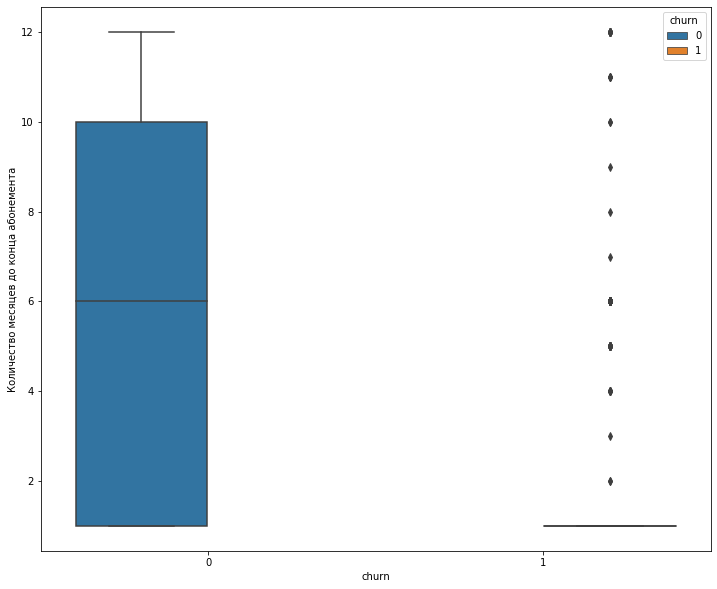

In [27]:

plt.figure(figsize = (12,10))
sns.boxplot(y='month_to_end_contract',x = 'churn', hue = 'churn',  data=df)
plt.ylabel('Количество месяцев до конца абонемента')
plt.show()

## Модель прогнозирования оттока клиентов

### Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
* Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
* Обучите модель на train-выборке двумя способами:
    * логистической регрессией
    * случайным лесом
* Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [28]:
# разделяю данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis = 1)
y = df['churn']

In [29]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Логистическая регрессия

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

In [33]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83


### Случайный лес

In [34]:
# обучаю StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)
#преобразую обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)
#зададаю алгоритм для нашей модели 
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [35]:
print('Accuracy | Нет баланса классов: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Accuracy | Нет баланса классов: 0.92
Precision: 0.84
Recall: 0.81


## Кластеризация клиентов


* Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):
* Стандартизируйте данные.
* Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
* Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
* Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
* Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
* Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?


In [36]:
#стандартизирую данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [37]:
#строю матрицу расстояний
linked = linkage(X_sc, method = 'ward')

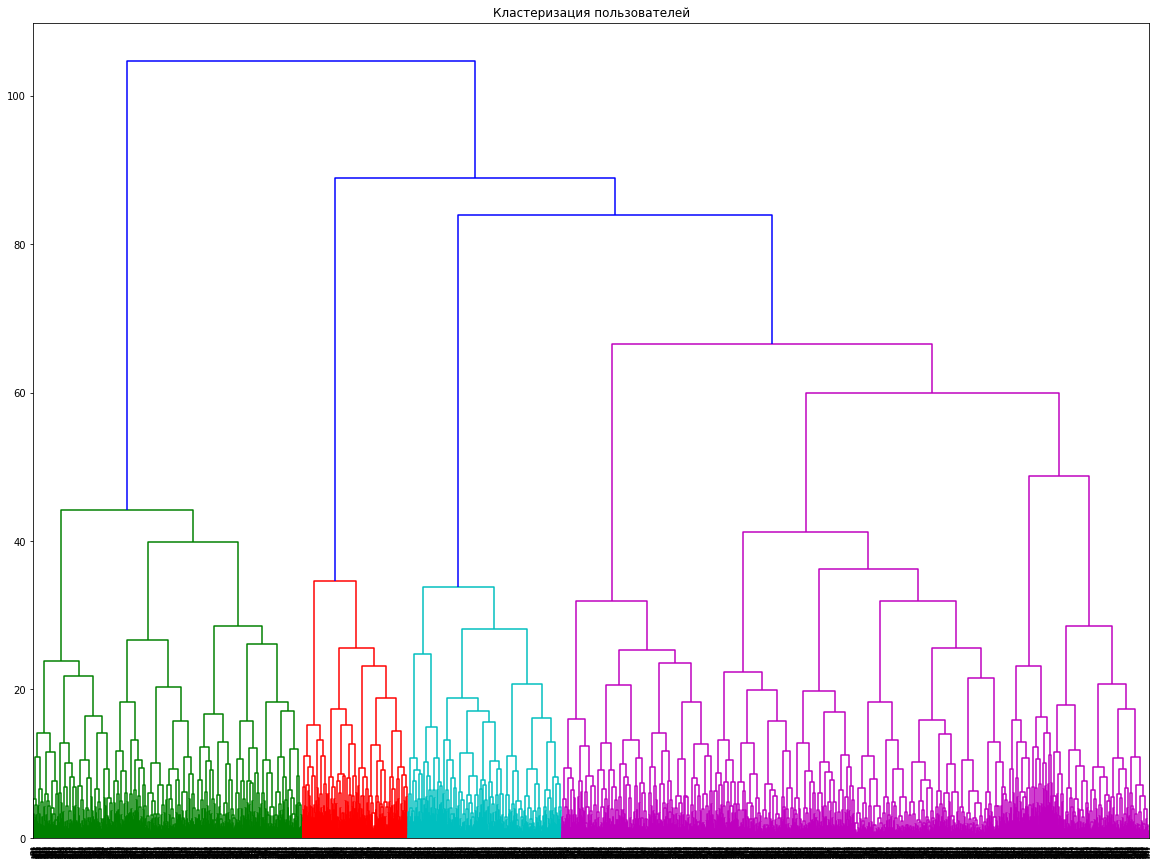

In [38]:
plt.figure(figsize=(20, 15))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

На основе данного графика можно выделить 4 кластера, но так как четвёртый кластер получился очень большим, можно разделить на 5 кластеров.


In [39]:
# задаю модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)

In [40]:
# прогнозирую кластеры для наблюдений
labels = km.fit_predict(X_sc)

In [41]:
# сохраняем метки кластера в поле датасета
df['cluster_km'] = labels

In [42]:
df.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.502,0.522,0.495,0.486,0.560
near_location,0.959,0.862,0.000,1.000,0.976
partner,0.783,0.470,0.463,0.350,0.356
promo_friends,0.575,0.306,0.079,0.240,0.229
phone,1.000,0.000,1.000,1.000,0.999
contract_period,10.884,4.787,2.352,1.948,2.665
group_visits,0.543,0.426,0.216,0.342,0.473
age,29.980,29.301,28.477,28.168,30.128
avg_additional_charges_total,160.707,143.958,135.458,131.622,161.724
month_to_end_contract,9.951,4.475,2.198,1.857,2.455


Сразу можно заметить следующие:
* пол и локейшен во всех примерно одинаковый
* в 1 кластере нет партнёров, а в третьемтолько парнёры
* в 0 кластере нет телефонов
* в 4 кластере самый длинные контракты, а также самое большое количество оставшихся месяцев
* возраст во всех кластерах примерно 30 лет


In [43]:
 cluster_churn=(df.groupby('cluster_km')['churn'].mean()*100).reset_index()

In [44]:
cluster_churn

,cluster_km,churn
0,0,2.770
1,1,26.753
2,2,44.356
3,3,51.426
4,4,6.810


Можно сказать, что наиболее успешны кластеры 4 и 2, где отток минимальный, далее идёт 0 кластер с 26 процентами и 3 кластер с 39. Хуже всего кластер 1, где отток 55 процентов.

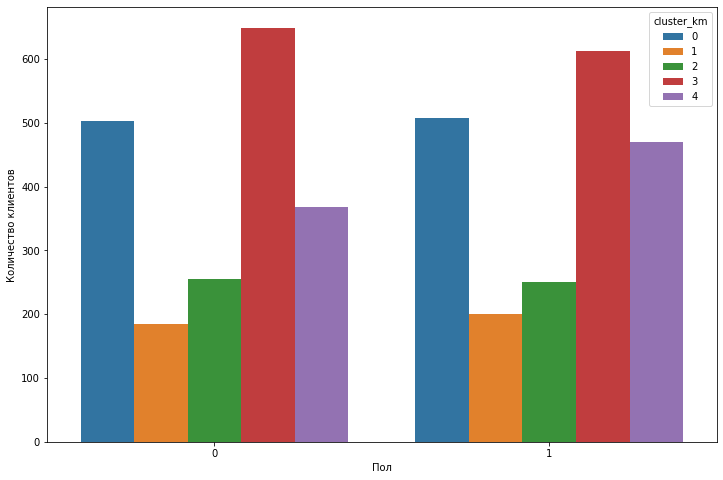

In [45]:
plt.figure(figsize = (12,8))
sns.countplot(x='gender', hue='cluster_km',  data=df)
plt.ylabel('Количество клиентов')
plt.xlabel('Пол')
plt.show()

На этом графике видно, что по соотношению мужчин иженщин кластеры разделились почи равномерно.

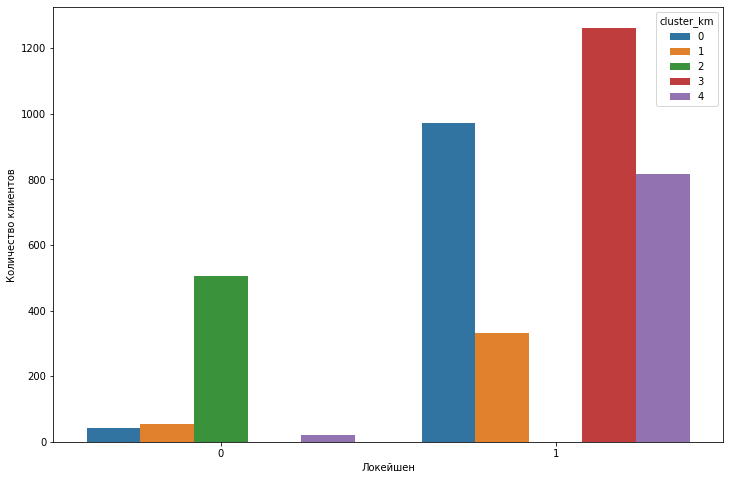

In [46]:
plt.figure(figsize = (12,8))
sns.countplot(x='near_location', hue='cluster_km',  data=df)
plt.ylabel('Количество клиентов')
plt.xlabel('Локейшен')
plt.show()

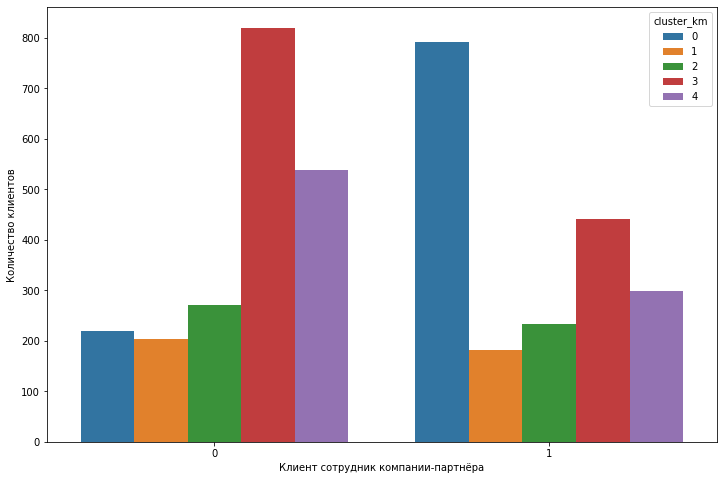

In [47]:
plt.figure(figsize = (12,8))
sns.countplot(x='partner', hue='cluster_km',  data=df)
plt.ylabel('Количество клиентов')
plt.xlabel('Клиент сотрудник компании-партнёра')
plt.show()

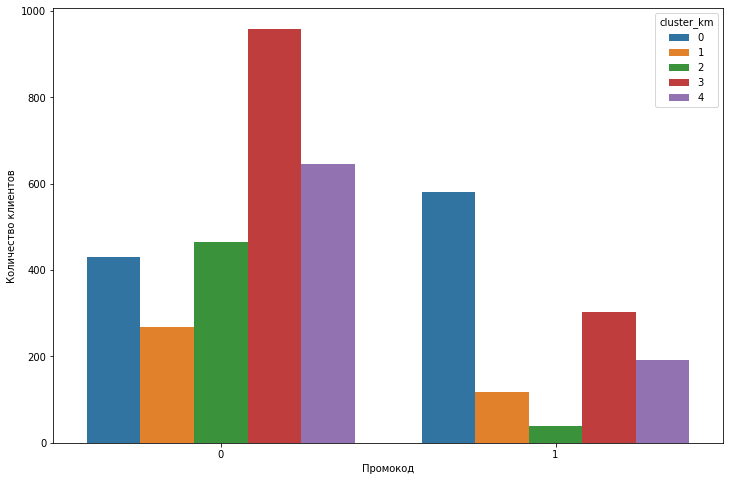

In [48]:
plt.figure(figsize = (12,8))
sns.countplot(x='promo_friends', hue='cluster_km',  data=df)
plt.ylabel('Количество клиентов')
plt.xlabel('Промокод')
plt.show()

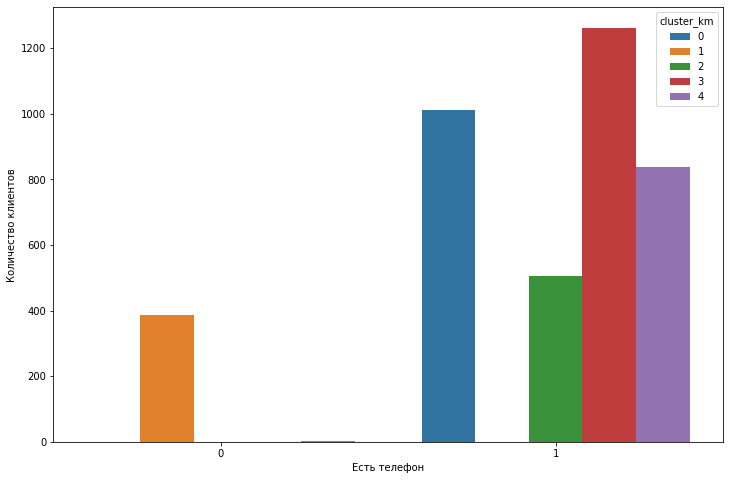

In [49]:
plt.figure(figsize = (12,8))
sns.countplot(x='phone', hue='cluster_km',  data=df)
plt.ylabel('Количество клиентов')
plt.xlabel('Есть телефон')
plt.show()

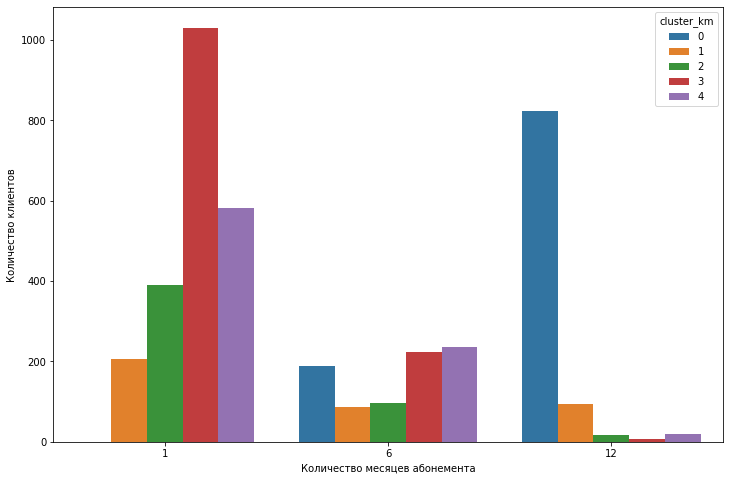

In [50]:

plt.figure(figsize = (12,8))
sns.countplot(x='contract_period', hue='cluster_km',  data=df)
plt.ylabel('Количество клиентов')
plt.xlabel('Количество месяцев абонемента')
plt.show()

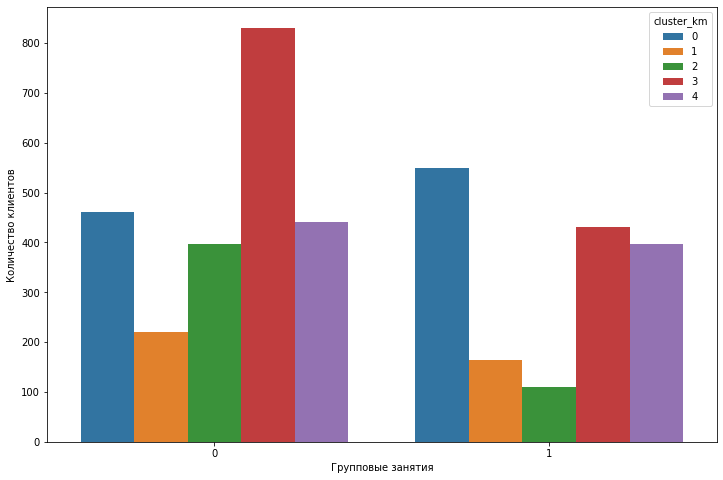

In [51]:
plt.figure(figsize = (12,8))
sns.countplot(x='group_visits', hue='cluster_km',  data=df)
plt.ylabel('Количество клиентов')
plt.xlabel('Групповые занятия')
plt.show()

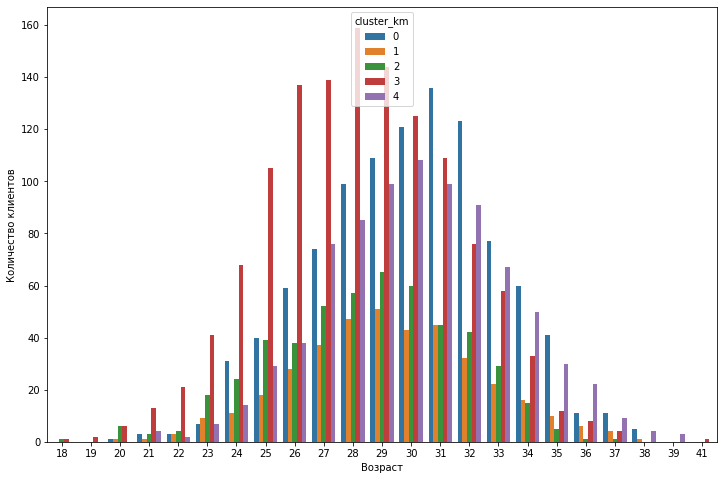

In [52]:
plt.figure(figsize = (12,8))
sns.countplot(x='age', hue='cluster_km',  data=df)
plt.ylabel('Количество клиентов')
plt.xlabel('Возраст')
plt.show()

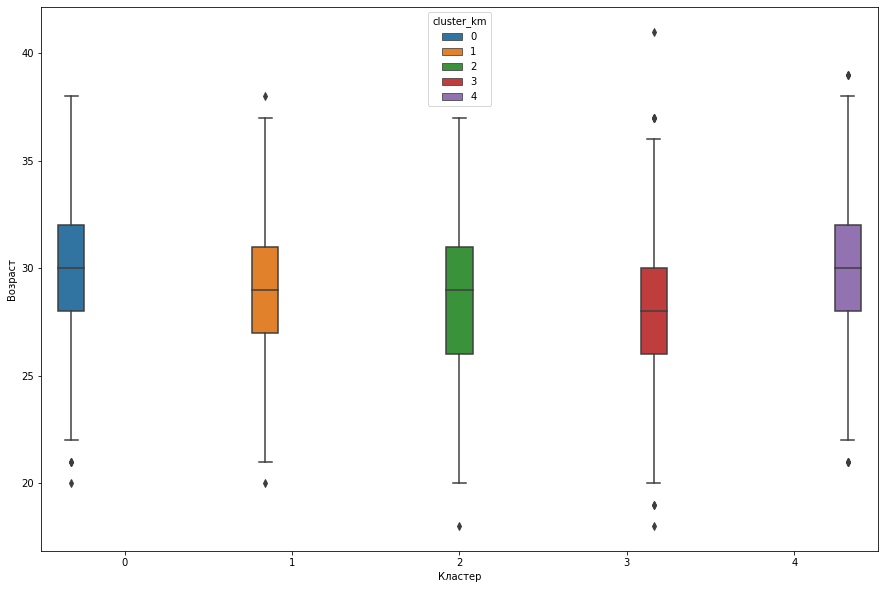

In [53]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'cluster_km', y='age', hue = 'cluster_km',  data=df)
plt.ylabel('Возраст')
plt.xlabel('Кластер')
plt.show()

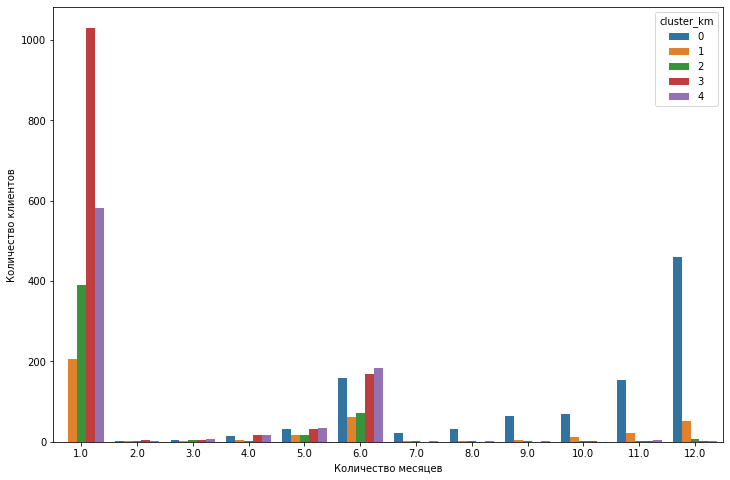

In [54]:
plt.figure(figsize = (12,8))
sns.countplot(x='month_to_end_contract', hue='cluster_km',  data=df)
plt.ylabel('Количество клиентов')
plt.xlabel('Количество месяцев')
plt.show()

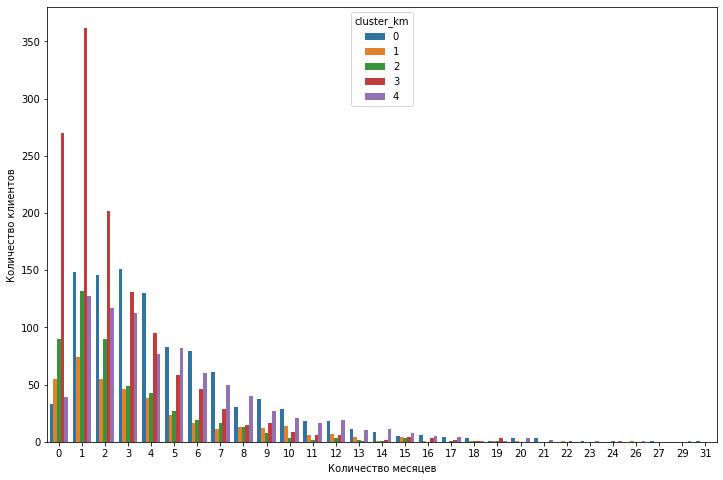

In [55]:
plt.figure(figsize = (12,8))
sns.countplot(x= 'lifetime', hue='cluster_km',  data=df)
plt.ylabel('Количество клиентов')
plt.xlabel('Количество месяцев')
plt.show()

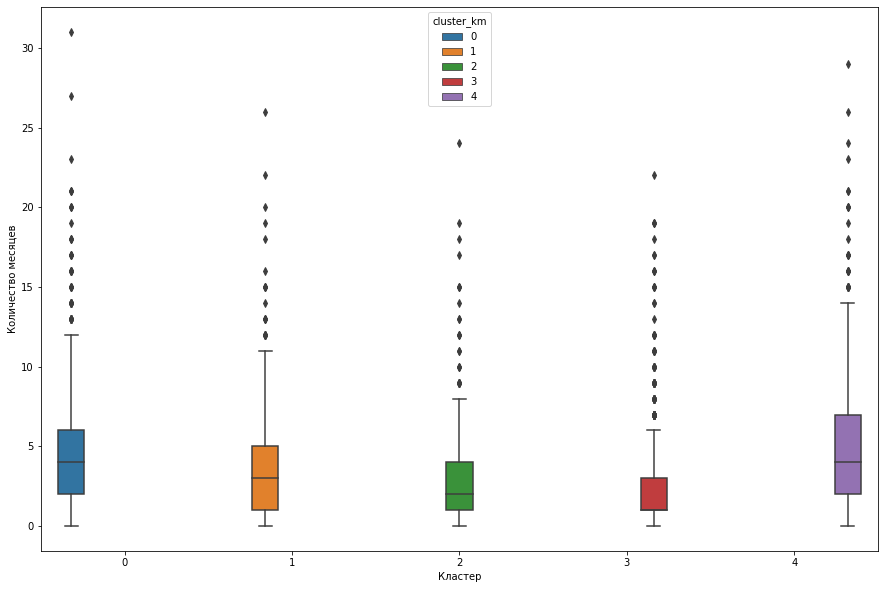

In [56]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'cluster_km', y='lifetime', hue = 'cluster_km',  data=df)
plt.ylabel('Количество месяцев')
plt.xlabel('Кластер')
plt.show()

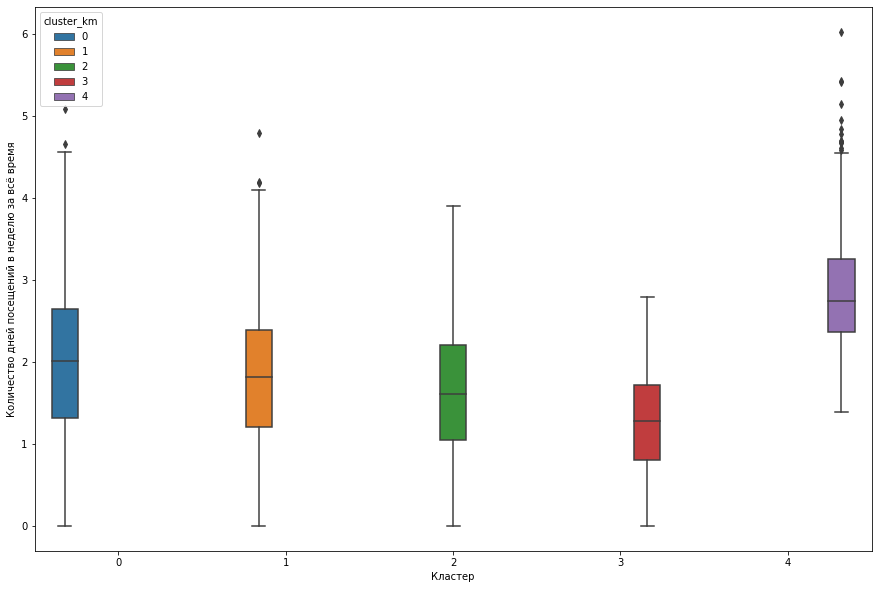

In [57]:
 
plt.figure(figsize = (15,10))
sns.boxplot(x = 'cluster_km', y='avg_class_frequency_total', hue = 'cluster_km',  data=df)
plt.ylabel('Количество дней посещений в неделю за всё время')
plt.xlabel('Кластер')
plt.show()

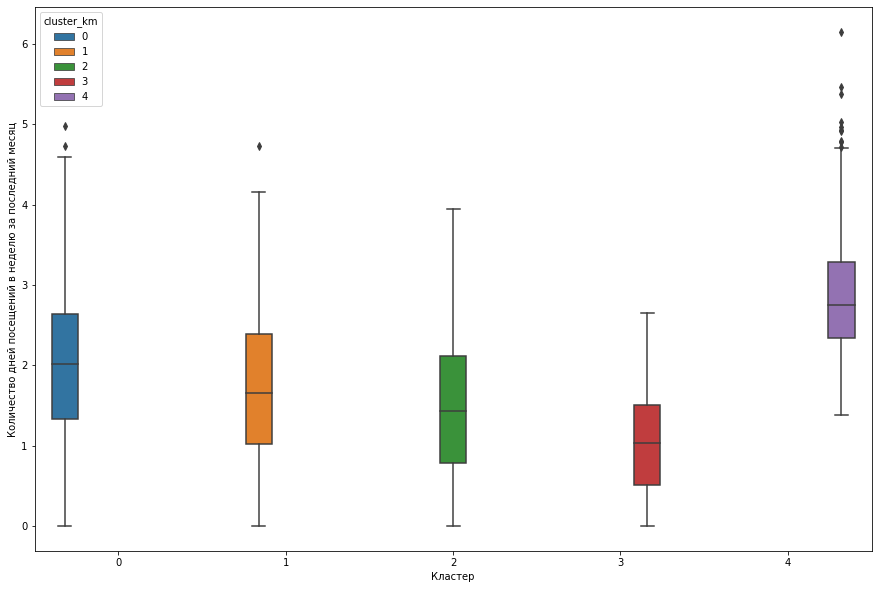

In [58]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'cluster_km', y= 'avg_class_frequency_current_month', hue = 'cluster_km',  data=df)
plt.ylabel('Количество дней посещений в неделю за последний месяц')
plt.xlabel('Кластер')
plt.show()

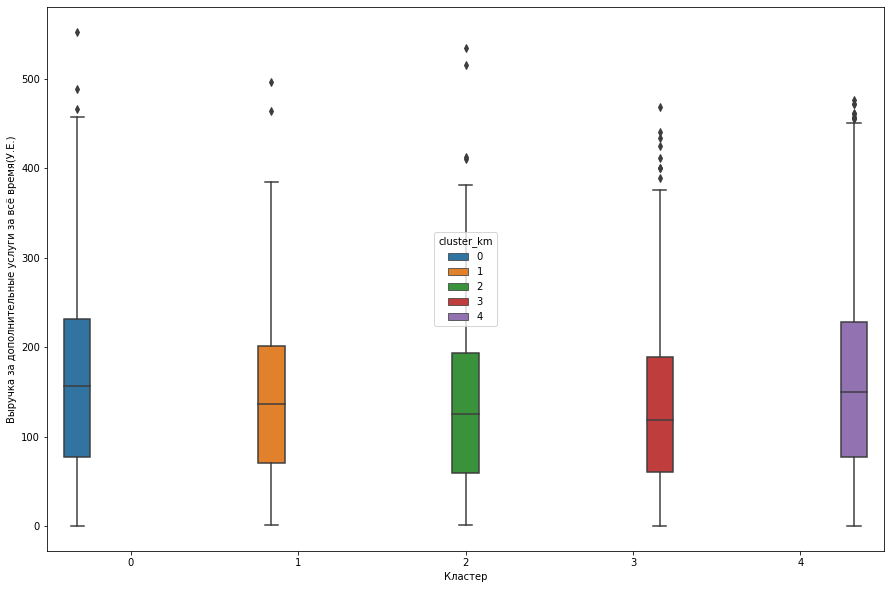

In [59]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'cluster_km', y= 'avg_additional_charges_total', hue = 'cluster_km',  data=df)
plt.ylabel('Выручка за дополнительные услуги за всё время(У.Е.)')
plt.xlabel('Кластер')
plt.show()

## Выводы и рекомендации

Я могу следущие выводы: 
* те, кто является клиентом давно то есть от 12 месяцев, вряд ли уйдут в отток. Такой вывод можно сделать по 4 кластеру. То есть нужно убедить клиента купить абонемент на как можно больший период.
* также я заметил, что отток больше среди молодых людей. Думаю, стоит предложить им больше скидку и тем самым их удержать, а, возможно, сделать для них какие-то разнообразные занятия. Так как молодые люди не всегда находят одну активностьь и занимаются только ей, скорее пробуют много разного. Нужно их этим обеспечить.